<a href="https://colab.research.google.com/github/x200706/AIML/blob/main/ML/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional, Layer
from keras import backend as K
import tensorflow as tf

# Import the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/source/dataset/Google_Stock_Price_Train.csv')  # 讀取訓練集
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


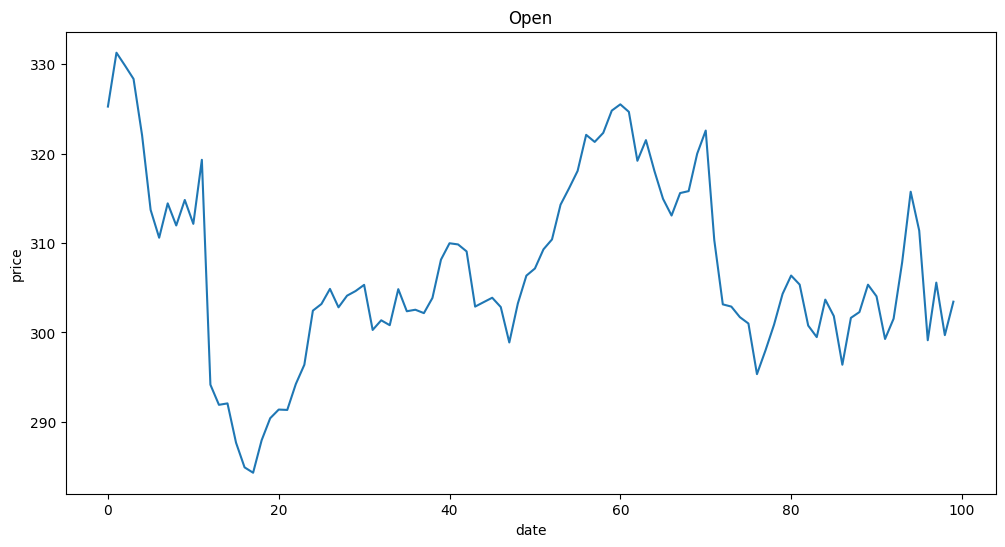

In [5]:
"""看看資料"""
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(dataset_train['Open'].head(100)),
plt.title('Open')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
from re import X
X_train = []   #預測點的前 WINDOWS 天的資料
y_train = []   #預測點
WINDOWS = 60
for i in range(WINDOWS, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-WINDOWS:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，LSTM
print(X_train.shape,y_train.shape)
print(X_train[10,0:WINDOWS-1],y_train[10,])


(1198, 60) (1198,)
[0.0614257  0.07474514 0.02797827 0.02379269 0.02409033 0.0159238
 0.01078949 0.00967334 0.01642607 0.02100231 0.02280676 0.02273235
 0.02810849 0.03212665 0.0433812  0.04475779 0.04790163 0.0440695
 0.04648783 0.04745517 0.04873875 0.03936305 0.04137213 0.04034898
 0.04784582 0.04325099 0.04356723 0.04286033 0.04602277 0.05398467
 0.05738894 0.05714711 0.05569611 0.04421832 0.04514845 0.04605997
 0.04412531 0.03675869 0.04486941 0.05065481 0.05214302 0.05612397
 0.05818885 0.06540665 0.06882953 0.07243843 0.07993526 0.07846566
 0.08034452 0.08497656 0.08627874 0.08471612 0.07454052 0.07883771
 0.07238262 0.06663442 0.06315574 0.06782499 0.06823424] 0.08082818662102831


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))#(3input)

In [ ]:
# Model 1: Bidirectional LSTM
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(units=100)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Model 2: Bidirectional GRU
gru_model = Sequential()
gru_model.add(Bidirectional(GRU(units=100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Bidirectional(GRU(units=100)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.0685
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: 0.0032
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0025
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0022
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0023
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0020
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0017
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0018
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0015
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0018
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0015
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - loss: 0.0014
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.0015
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0015
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/

In [ ]:
# Custom activation functions
def softplus(x):
    return tf.math.softplus(x)

def exp_activation(x):
    return tf.exp(tf.clip_by_value(x, -10, 10))  # Clip to avoid overflow

# Custom ELSTM Layer with merged matrix multiplication
class ELSTMLayer(Layer):
    def __init__(self, units, return_sequences=False, **kwargs):
        super(ELSTMLayer, self).__init__(**kwargs)
        self.units = units
        self.return_sequences = return_sequences

    def build(self, input_shape):
        # Merged kernel for all gates (forget, input, candidate, output)
        self.kernel = self.add_weight(
            name='kernel',
            shape=(input_shape[-1] + self.units, 4 * self.units),
            initializer='glorot_uniform'
        )
        # Merged bias for all gates
        self.bias = self.add_weight(
            name='bias',
            shape=(4 * self.units,),
            initializer='zeros'
        )
        self.built = True

    def call(self, inputs, states=None):
        if states is None:
            h_tm1 = tf.zeros((tf.shape(inputs)[0], self.units))
            c_tm1 = tf.zeros((tf.shape(inputs)[0], self.units))
        else:
            h_tm1, c_tm1 = states

        batch_size, timesteps = tf.shape(inputs)[0], tf.shape(inputs)[1]
        outputs = tf.TensorArray(dtype=tf.float32, size=timesteps)

        def body(t, h_tm1, c_tm1, outputs):
            x_t = inputs[:, t, :]
            concat = tf.concat([h_tm1, x_t], axis=1)

            # Single matrix multiplication for all gates
            gates = tf.matmul(concat, self.kernel) + self.bias
            # Split into four gates
            f_t, i_t, c_tilde, o_t = tf.split(gates, 4, axis=1)

            # Apply activation functions
            f_t = softplus(f_t)
            i_t = exp_activation(i_t)
            c_tilde = tf.tanh(c_tilde)
            c_t = f_t * c_tm1 + i_t * c_tilde
            o_t = tf.sigmoid(o_t)
            h_t = o_t * tf.tanh(c_t)

            outputs = outputs.write(t, h_t)
            return t + 1, h_t, c_t, outputs

        _, h_t, c_t, outputs = tf.while_loop(
            cond=lambda t, *_: t < timesteps,
            body=body,
            loop_vars=(0, h_tm1, c_tm1, outputs)
        )

        outputs = outputs.stack()
        outputs = tf.transpose(outputs, [1, 0, 2])  # (batch_size, timesteps, units)
        if not self.return_sequences:
            outputs = outputs[:, -1, :]

        return outputs, [h_t, c_t]

    def compute_output_shape(self, input_shape):
        if self.return_sequences:
            return (input_shape[0], input_shape[1], self.units)
        return (input_shape[0], self.units)

    def get_config(self):
        config = super(ELSTMLayer, self).get_config()
        config.update({'units': self.units, 'return_sequences': self.return_sequences})
        return config

In [ ]:
# Model 3: ELSTM
elstm_model = Sequential()
elstm_model.add(ELSTMLayer(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
elstm_model.add(Dropout(0.2))
elstm_model.add(ELSTMLayer(units=100))
elstm_model.add(Dropout(0.2))
elstm_model.add(Dense(units=1))
elstm_model.compile(optimizer='adam', loss='mean_squared_error')
elstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


<ipython-input-162-7567c509e316>:11: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(ELSTMLayer, self).__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 637ms/step - loss: 0.0883
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 640ms/step - loss: 0.0056
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - loss: 0.0044
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 636ms/step - loss: 0.0040
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - loss: 0.0032
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 632ms/step - loss: 0.0033
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 623ms/step - loss: 0.0031
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 637ms/step - loss: 0.0027
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 652ms/step - loss: 0.0023
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 627ms/step - loss: 0.0022
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 639ms/step - loss: 0.0027
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - loss: 0.0025
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 627ms/step - loss: 0.0027
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 650ms/step - loss: 0.0022
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [ ]:
# Model 4: ELSTM改參數改結構
elstm_model1 = Sequential()
elstm_model1.add(ELSTMLayer(units=200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
elstm_model1.add(Dropout(0.2))
elstm_model1.add(ELSTMLayer(units=200))
elstm_model1.add(Dropout(0.2))
elstm_model1.add(Dense(units=1))
elstm_model1.compile(optimizer='adam', loss='mean_squared_error')
elstm_model1.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

<ipython-input-162-7567c509e316>:11: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(ELSTMLayer, self).__init__(**kwargs)


Epoch 1/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 841ms/step - loss: 0.2952
Epoch 2/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 839ms/step - loss: 0.0400
Epoch 3/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 826ms/step - loss: 0.0175
Epoch 4/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 859ms/step - loss: 0.0064
Epoch 5/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 831ms/step - loss: 0.0041
Epoch 6/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 859ms/step - loss: 0.0034
Epoch 7/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 830ms/step - loss: 0.0026
Epoch 8/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 821ms/step - loss: 0.0028
Epoch 9/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 854ms/step - loss: 0.0024
Epoch 10/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 834ms/step - loss: 0.0022
Epoch 11/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 859ms/step - loss: 0.0022
Epoch 12/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 847ms/step - loss: 0.0019
Epoch 13/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 825ms/step - loss: 0.0019
Epoch 14/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 863ms/step - loss: 0.0019
Epoch 15/150
38/38 ━━━━━━━━━━

In [9]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/source/dataset/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total.describe(include='all')


,Open
count,1278.000000
mean,537.994906
std,154.508365
min,279.120000
25%,406.037500
50%,538.395000
75%,668.862500
max,837.810000


In [10]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(60, 80):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

In [ ]:
# Predict with all models
lstm_predicted = lstm_model.predict(X_test)
lstm_predicted = sc.inverse_transform(lstm_predicted)

gru_predicted = gru_model.predict(X_test)
gru_predicted = sc.inverse_transform(gru_predicted)

elstm_predicted = elstm_model.predict(X_test)
elstm_predicted = sc.inverse_transform(elstm_predicted)

elstm_predicted1 = elstm_model1.predict(X_test)
elstm_predicted1 = sc.inverse_transform(elstm_predicted1)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


In [ ]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(lstm_predicted, color='blue', label='LSTM Predicted Price')
plt.plot(gru_predicted, color='green', label='GRU Predicted Price')
plt.plot(elstm_predicted, color='purple', label='ELSTM Predicted Price')
plt.plot(elstm_predicted1, color='orange', label='ELSTM Predicted Price(Edit Ver)')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### 參考文獻
- [[實戰系列] 使用 Keras 搭建一個 LSTM 魔法陣（模型）](https://ithelp.ithome.com.tw/articles/10206312)

# 使用GA調整參數與模型結構
## 第一種：自己寫GA 跑太久了沒給它跑完

In [11]:
import time

In [8]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import pygad

def fitness_func(ga_instance, solution, solution_idx):
    units = int(solution[0])
    dropout_rate = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    model = Sequential()
    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(LSTM(units=units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # 分割驗證集
    val_split = 0.2
    split_idx = int(len(X_train) * (1 - val_split))
    X_train_split, X_val = X_train[:split_idx], X_train[split_idx:]
    y_train_split, y_val = y_train[:split_idx], y_train[split_idx:]

    model.fit(X_train_split, y_train_split, epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))

    val_predictions = model.predict(X_val, verbose=0)
    mse = np.mean((val_predictions - y_val) ** 2)

    # 適應度為MSE的倒數
    fitness = 1.0 / (mse + 1e-8)
    print(f"Solution {solution_idx} completed: MSE={mse:.6f}, Fitness={fitness:.6f}")
    return fitness

# 定義超參數搜尋空間
gene_space = [
    {'low': 50, 'high': 200},
    {'low': 0.1, 'high': 0.5},
    {'low': 1e-4, 'high': 1e-2},
    [16, 32, 64]
]

ga_instance = pygad.GA(
    num_generations=20,
    num_parents_mating=4,
    fitness_func=fitness_func,
    sol_per_pop=10,
    num_genes=len(gene_space),  # 超參數數量
    gene_space=gene_space,
    mutation_percent_genes=10,  # 變異率
    gene_type=[int, float, float, int],
)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
best_units = int(solution[0])
best_dropout_rate = solution[1]
best_learning_rate = solution[2]
best_batch_size = int(solution[3])

print(f"Best parameters: units={best_units}, dropout_rate={best_dropout_rate}, learning_rate={best_learning_rate}, batch_size={best_batch_size}")
print(f"Best fitness (1/MSE): {solution_fitness}")

# 使用最佳參數訓練最終模型
print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] Training final model with best parameters...")
best_model = Sequential()
best_model.add(Bidirectional(LSTM(units=best_units, return_sequences=True), input_shape=(X_train.shape[1], 1)))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Bidirectional(LSTM(units=best_units)))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(units=1))
best_model.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='mean_squared_error')
best_model.fit(X_train, y_train, epochs=100, batch_size=best_batch_size, verbose=1)

# 預測
print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] Generating predictions...")
lstm_predicted = best_model.predict(X_test)
lstm_predicted = sc.inverse_transform(lstm_predicted)

# 繪製結果
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(lstm_predicted, color='blue', label='LSTM Predicted Price (GA-Tuned)')
plt.title('Google Stock Price Prediction (GA-Tuned Model)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

"""
訓練三小時未完成被斷線
因為還在猶豫要購買Colab還是Kaggle付費方案，暫時不升級Colab，改試下方成熟GA超參搜尋套件
"""

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Solution 0 completed: MSE=0.007997, Fitness=125.052712


Solution 1 completed: MSE=0.008411, Fitness=118.895549


Solution 2 completed: MSE=0.008428, Fitness=118.657763
Solution 3 completed: MSE=0.009346, Fitness=106.997634
Solution 4 completed: MSE=0.008181, Fitness=122.228477
Solution 5 completed: MSE=0.008351, Fitness=119.742220
Solution 6 completed: MSE=0.008003, Fitness=124.947157
Solution 7 completed: MSE=0.007569, Fitness=132.126187
Solution 8 completed: MSE=0.008411, Fitness=118.893203
Solution 9 completed: MSE=0.007766, Fitness=128.772171
Solution 1 completed: MSE=0.007955, Fitness=125.699558
Solution 2 completed: MSE=0.007781, Fitness=128.522866
Solution 3 completed: MSE=0.008529, Fitness=117.246692
Solution 4 completed: MSE=0.007611, Fitness=131.388854
Solution 5 completed: MSE=0.007705, Fitness=129.779828
Solution 6 completed: MSE=0.008327, Fitness=120.085946
Solution 7 completed: MSE=0.008092, Fitness=123.583550
Solution 8 completed: MSE=0.007786, Fitness=128.428457
Solution 9 completed: MSE=0.008334, Fitness=119.983768
Solution 1 completed: MSE=0.008868, Fitness=112.763586
Solution 2

## 第二種：用超參數搜索套件

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 12.2 MB/s eta 0:00:00


[I 2025-05-10 04:12:33,985] A new study created in memory with name: no-name-1190b9c5-f851-4126-aef4-e350e6696b35
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2025-05-10 04:29:18,455] Trial 0 finished with value: 0.008980503302281829 and parameters: {'units': 194, 'dropout_rate': 0.2876288863303178, 'learning_rate': 0.005160166518182597, 'batch_size': 64}. Best is trial 0 with value: 0.008980503302281829.


[2025-05-10 04:29:18] Trial 0 completed: MSE=0.008981


[I 2025-05-10 04:34:44,312] Trial 1 finished with value: 0.009315385755706661 and parameters: {'units': 67, 'dropout_rate': 0.4313015202378726, 'learning_rate': 0.0011547881752633866, 'batch_size': 32}. Best is trial 0 with value: 0.008980503302281829.


[2025-05-10 04:34:44] Trial 1 completed: MSE=0.009315


[I 2025-05-10 04:39:12,730] Trial 2 finished with value: 0.00785792122099542 and parameters: {'units': 61, 'dropout_rate': 0.3710139140603179, 'learning_rate': 0.0026635787028756607, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 04:39:12] Trial 2 completed: MSE=0.007858


[I 2025-05-10 04:48:12,944] Trial 3 finished with value: 0.008295234444671644 and parameters: {'units': 121, 'dropout_rate': 0.3316288562196819, 'learning_rate': 0.0001312061476303927, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 04:48:12] Trial 3 completed: MSE=0.008295


[I 2025-05-10 04:52:17,671] Trial 4 finished with value: 0.00966891774577054 and parameters: {'units': 50, 'dropout_rate': 0.13225651320431575, 'learning_rate': 0.008014431856637628, 'batch_size': 32}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 04:52:17] Trial 4 completed: MSE=0.009669


[I 2025-05-10 05:04:51,380] Trial 5 finished with value: 0.008429471413486005 and parameters: {'units': 107, 'dropout_rate': 0.3963222113565107, 'learning_rate': 0.0012522718663042292, 'batch_size': 32}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 05:04:51] Trial 5 completed: MSE=0.008429


[I 2025-05-10 05:13:18,517] Trial 6 finished with value: 0.008451906756285769 and parameters: {'units': 86, 'dropout_rate': 0.25641753171476883, 'learning_rate': 0.00011886312477484678, 'batch_size': 32}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 05:13:18] Trial 6 completed: MSE=0.008452


[I 2025-05-10 05:28:57,672] Trial 7 finished with value: 0.008778945770216469 and parameters: {'units': 118, 'dropout_rate': 0.36973099496582307, 'learning_rate': 0.0002369823644603462, 'batch_size': 32}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 05:28:57] Trial 7 completed: MSE=0.008779


[I 2025-05-10 05:37:03,090] Trial 8 finished with value: 0.008533597579292848 and parameters: {'units': 51, 'dropout_rate': 0.3791297086374199, 'learning_rate': 0.0022798968903414954, 'batch_size': 16}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 05:37:03] Trial 8 completed: MSE=0.008534


[I 2025-05-10 05:44:50,651] Trial 9 finished with value: 0.008048279635533619 and parameters: {'units': 51, 'dropout_rate': 0.4464675002667232, 'learning_rate': 0.0004874942040337989, 'batch_size': 16}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 05:44:50] Trial 9 completed: MSE=0.008048


[I 2025-05-10 06:00:56,906] Trial 10 finished with value: 0.008386688322702812 and parameters: {'units': 172, 'dropout_rate': 0.418688950608167, 'learning_rate': 0.007391875674230213, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 06:00:56] Trial 10 completed: MSE=0.008387


[I 2025-05-10 06:09:29,913] Trial 11 finished with value: 0.007960911666749339 and parameters: {'units': 77, 'dropout_rate': 0.25705536290938824, 'learning_rate': 0.00011079942187101706, 'batch_size': 16}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 06:09:29] Trial 11 completed: MSE=0.007961


[I 2025-05-10 06:13:20,881] Trial 12 finished with value: 0.008066272459102295 and parameters: {'units': 55, 'dropout_rate': 0.23525866948303947, 'learning_rate': 0.005223355986707632, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 06:13:20] Trial 12 completed: MSE=0.008066


[I 2025-05-10 06:28:51,459] Trial 13 finished with value: 0.008112390930858717 and parameters: {'units': 145, 'dropout_rate': 0.4204107587144481, 'learning_rate': 0.006271264354176982, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 06:28:51] Trial 13 completed: MSE=0.008112


[I 2025-05-10 06:44:56,191] Trial 14 finished with value: 0.008593858428266222 and parameters: {'units': 124, 'dropout_rate': 0.13727880108531854, 'learning_rate': 0.0024527520933425753, 'batch_size': 32}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 06:44:56] Trial 14 completed: MSE=0.008594


[I 2025-05-10 06:59:31,558] Trial 15 finished with value: 0.008469524926024244 and parameters: {'units': 96, 'dropout_rate': 0.45962456593203616, 'learning_rate': 0.0028425284169515366, 'batch_size': 16}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 06:59:31] Trial 15 completed: MSE=0.008470


[I 2025-05-10 07:26:20,420] Trial 16 finished with value: 0.010386671385167709 and parameters: {'units': 138, 'dropout_rate': 0.4802395831719354, 'learning_rate': 0.0001203903663843306, 'batch_size': 16}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 07:26:20] Trial 16 completed: MSE=0.010387


[I 2025-05-10 07:34:04,313] Trial 17 finished with value: 0.008462045819135658 and parameters: {'units': 83, 'dropout_rate': 0.290407625746886, 'learning_rate': 0.0006242112261105804, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 07:34:04] Trial 17 completed: MSE=0.008462


[I 2025-05-10 07:42:24,986] Trial 18 finished with value: 0.008269815069361496 and parameters: {'units': 104, 'dropout_rate': 0.35595952545759013, 'learning_rate': 0.004717553736207802, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 07:42:24] Trial 18 completed: MSE=0.008270


[I 2025-05-10 07:58:39,513] Trial 19 finished with value: 0.008033394316825976 and parameters: {'units': 155, 'dropout_rate': 0.250237219925503, 'learning_rate': 0.0032747775725792284, 'batch_size': 64}. Best is trial 2 with value: 0.00785792122099542.


[2025-05-10 07:58:39] Trial 19 completed: MSE=0.008033
Best parameters: {'units': 61, 'dropout_rate': 0.3710139140603179, 'learning_rate': 0.0026635787028756607, 'batch_size': 64}
Best MSE: 0.00785792122099542
[2025-05-10 07:58:39] Training final model with best parameters...
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - loss: 0.1033
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - loss: 0.0072
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - loss: 0.0053
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - loss: 0.0042
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0038
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - loss: 0.0039
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - loss: 0.0037
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - loss: 0.0034
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0033
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - loss: 0.0033
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6

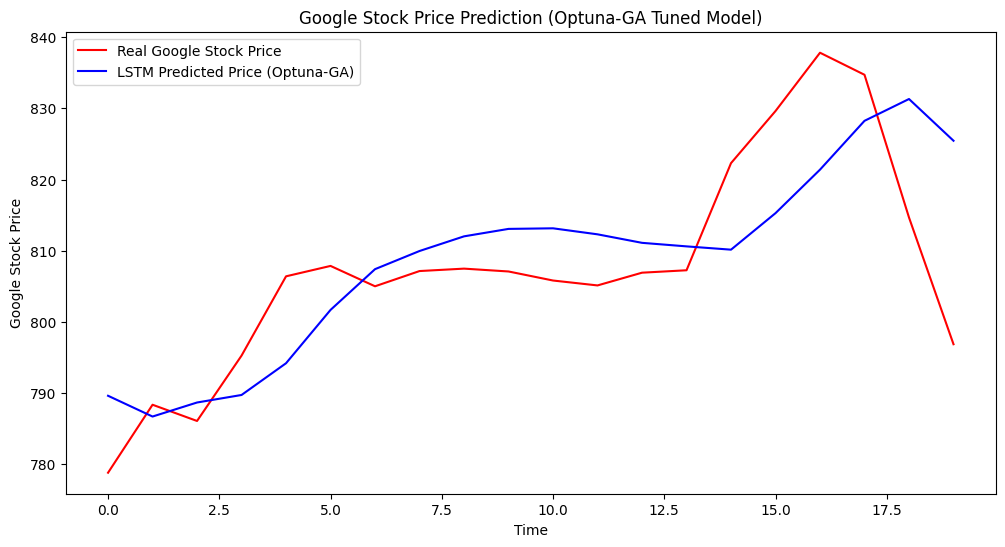

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import optuna
from optuna.samplers import NSGAIISampler

# 定義目標函數
def objective(trial):
    units = trial.suggest_int("units", 50, 200)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(LSTM(units=units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # 分割驗證集（20% 作為驗證集）
    val_split = 0.2
    split_idx = int(len(X_train) * (1 - val_split))
    X_train_split, X_val = X_train[:split_idx], X_train[split_idx:]
    y_train_split, y_val = y_train[:split_idx], y_train[split_idx:]

    model.fit(X_train_split, y_train_split, epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))

    # 計算驗證集 MSE
    val_predictions = model.predict(X_val, verbose=0)
    mse = np.mean((val_predictions - y_val) ** 2)
    print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] Trial {trial.number} completed: MSE={mse:.6f}")
    return mse


# 初始化Optuna試驗，使用 NSGA-II 採樣器（遺傳演算法）
study = optuna.create_study(direction="minimize", sampler=NSGAIISampler())
study.optimize(objective, n_trials=20)  # 運行試驗20次

best_params = study.best_params
best_value = study.best_value
print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_value}")

# 使用最佳參數訓練最終模型
print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] Training final model with best parameters...")
best_model = Sequential()
best_model.add(Bidirectional(LSTM(units=best_params["units"], return_sequences=True), input_shape=(X_train.shape[1], 1)))
best_model.add(Dropout(best_params["dropout_rate"]))
best_model.add(Bidirectional(LSTM(units=best_params["units"])))
best_model.add(Dropout(best_params["dropout_rate"]))
best_model.add(Dense(units=1))
best_model.compile(optimizer=Adam(learning_rate=best_params["learning_rate"]), loss='mean_squared_error')
best_model.fit(X_train, y_train, epochs=100, batch_size=best_params["batch_size"], verbose=1)

# 預測
print(f"[{time.strftime('%Y-%m-%d %H:%M:%S')}] Generating predictions...")
lstm_predicted = best_model.predict(X_test)
lstm_predicted = sc.inverse_transform(lstm_predicted)

# 繪製結果
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(lstm_predicted, color='blue', label='LSTM Predicted Price (Optuna-GA)')
plt.title('Google Stock Price Prediction (Optuna-GA Tuned Model)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# 在local看Dashboard比較方便，colab要另外起服務，在此略過

"""
訓練一小時二分完成
"""